In [1]:

import random 
import tensorflow as tf 
import matplotlib.pyplot as plt 
from sklearn.metrics import accuracy_score 

from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Flatten ,Conv2D ,Dense ,MaxPooling2D
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical 
from tensorflow.keras.datasets import mnist 

In [2]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [3]:
print(x_train.shape)

(60000, 28, 28)


In [4]:
x_train[0].min(),x_train.max()

(0, 255)

In [5]:
x_train=(x_train - 0.0) / (255.0 -0.0)
x_test=(x_test - 0.0) / (255.0 - 0.0)
x_train[0].min(), x_train[0].max()

(0.0, 1.0)

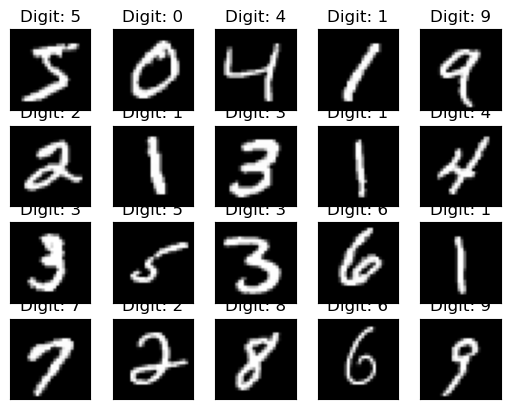

In [6]:
for i in range(20):
    plt.subplot(4, 5, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Digit: {y_train[i]}")
    plt.xticks([])
    plt.yticks([])
plt.show()

In [7]:
x_train = x_train.reshape((x_train.shape + (1,)))
x_test=x_test.reshape((x_test.shape + (1,)))

In [8]:
y_train[0:20]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9],
      dtype=uint8)

In [9]:
model=Sequential([
    Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(100,activation='relu'),
    Dense(10,activation="softmax")
])

In [10]:
model.compile(optimizer=SGD(0.01, 0.9),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 100)               540900    
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 542,230
Trainable params: 542,230
Non-trainable params: 0
__________________________________________________

In [11]:
model.fit(x_train,y_train,epochs=10,batch_size=32)

Epoch 1/10


2024-11-05 23:34:48.985783: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1875/1875 [==============================] - 9s 5ms/step - loss: 0.2369 - accuracy: 0.9286
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0743 - accuracy: 0.9780
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0459 - accuracy: 0.9862
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0326 - accuracy: 0.9904
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0246 - accuracy: 0.9925
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0183 - accuracy: 0.9944
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0134 - accuracy: 0.9960
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0106 - accuracy: 0.9968
Epoch 9/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0075 - accuracy: 0.9980
Epoch 10/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0054 - accurac

In [12]:
for i in range(20):
    image = random.choice(x_test).squeeze()
    digit = np.argmax(model.predict(image.reshape(1, 28, 28, 1)))
    plt.subplot(4, 5, i + 1)
    plt.imshow(image, cmap='gray')
    plt.title(f"{digit}")
    plt.axis('off')
plt.show()

NameError: name 'np' is not defined

In [13]:
import numpy as np
predictions=np.argmax(model.predict(x_test),axis=-1)
accuracy_score(y_test,predictions)

313/313 [==============================] - 1s 2ms/step


0.9867

In [ ]:
score=model.evaluate(x_test,y_test,verbose=0)
print("test loss",score[0])
print("test_accuracy",score[1])

NameError: name 'error_df' is not defined